<a href="https://colab.research.google.com/github/dev-nanthan/Vision_Lab1/blob/main/Lab1_trans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1, 2: Read the image and convert the image to a grayscale image

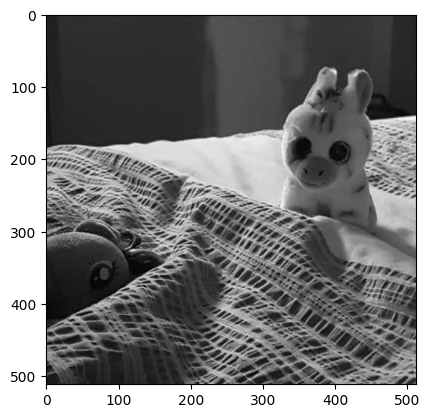

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

# Read the image in RGB format
image = cv2.imread('im1.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.show()


## Task 3: Define the transformation matrix with a rotation angle of 45 degrees

In [83]:
# Define angle in degrees
rotation_angle = 45

# Convert the rotation angle to radians
angle_theta = math.radians(rotation_angle)

# Calculate the sine and cosine of the angle
cos_theta = math.cos(angle_theta)
sin_theta = math.sin(angle_theta)

# Create the transformation (Rotation) matrix
matrix_T = np.array([[cos_theta, sin_theta, 0],
                     [-sin_theta, cos_theta, 0],
                     [0, 0, 1]])

# Print the transformation (Rotation) matrix
print("Rotation Matrix:\n",matrix_T)


Rotation Matrix:
 [[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


## Task 4: Calculate the size of the transformed image and generate an empty image with the calculated size.


**Discussion:** We build a 3x4 matrix (*org_corners*) with the corner coordinates [x, y, 1] (using homogeneous coordinates) for the top-left, top-right, bottom-right, and bottom-left corners of the original picture, respectively, in order to determine the corners of the original image.

The rotation matrix is then applied to the corners by multiplying the rotation_matrix by the *org_corners* matrix. *rotated_corners* matrix is new matrix with rotated corners.

Then, x and y values from the *rotated_corners* matrix in order to get the new corner coordinates.

The new picture size is then determined by deducting the lowest and maximum x and y values of the changed corners. The values are transformed into integers using the int function.

org image size: 512 512
Original Corners:
 [[  0   0   1]
 [512   0   1]
 [  0 512   1]
 [512 512   1]]
Rotated Corners:
 [[ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 3.62038672e+02  3.62038672e+02  1.00000000e+00]
 [-3.62038672e+02  3.62038672e+02  1.00000000e+00]
 [ 5.68434189e-14  7.24077344e+02  1.00000000e+00]]
New Image Size: 724 x 724


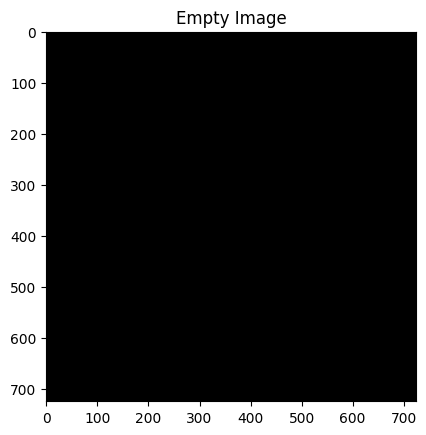

In [84]:
# Get the Size of Original image
x_max = gray_image.shape[1] #width
y_max = gray_image.shape[0] #height
print("org image size:", x_max, y_max)

# build a 3x4 matrix (org_corners) with the corner coordinates [x, y, 1]
org_corners = np.array([[0, 0, 1],
                    [x_max, 0, 1],
                    [0, y_max, 1],
                    [x_max, y_max, 1]])
print("Original Corners:\n",org_corners)

# rotation matrix is then applied to the corners
rotated_corners = np.dot(org_corners, matrix_T)
print("Rotated Corners:\n", rotated_corners)


# Extract the x and y coordinates of the transformed corners
new_corner_x = rotated_corners[:, 0] #width
new_corner_y = rotated_corners[:, 1] #height

# Calculate the minimum and maximum x and y values to get the new image size
new_image_width = int(np.max(new_corner_x) - np.min(new_corner_x))
new_image_height = int(np.max(new_corner_y) - np.min(new_corner_y))

# Print the new image size
print("New Image Size:", new_image_width, "x", new_image_height)

# Generate an empty image with the calculated size
empty_image = np.zeros((new_image_height, new_image_width), dtype=np.uint8)

# Display the grayscale image
plt.imshow(np.zeros_like(empty_image), cmap='gray')
plt.title('Empty Image')
plt.show()


## Task 5,6:Transform each pixel of the original image with the transformation matrix and assign the intensity to the new location. Show the image

min Width, height: 362 0


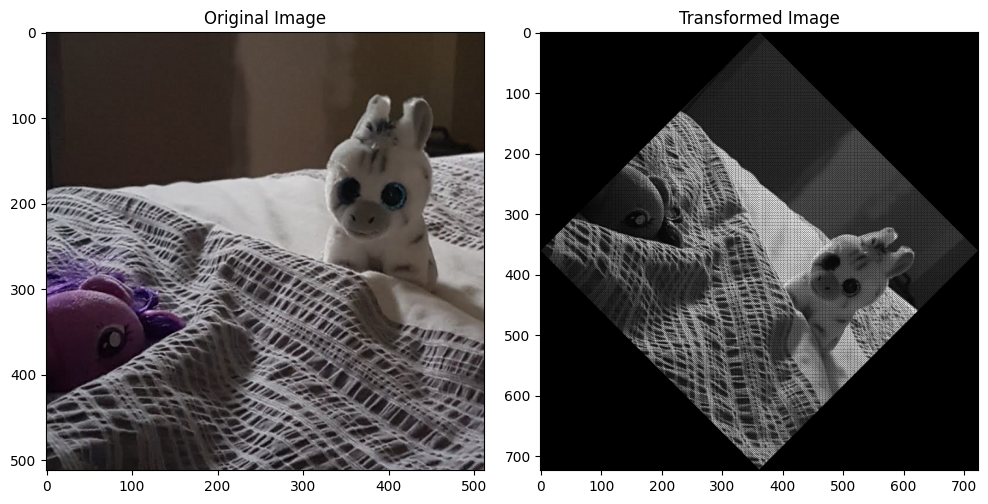

In [85]:
min_width = abs(np.min(new_corner_x));
min_height = abs(np.min(new_corner_y));

min_width = int(min_width);
min_height = int(min_height);

print("min Width, height:", min_width, min_height)

# Generate an empty image with the calculated size
rot_empty_image = np.zeros((new_image_height, new_image_width), dtype=np.uint8)

# Transform each pixel of the original grayscale image
for y in range(y_max):
    for x in range(x_max):
        pixel = np.array([x, y, 1])
        transformed_pixel = np.dot(pixel, matrix_T)
        new_x = int(transformed_pixel[0]) + min_width
        new_y = int(transformed_pixel[1]) + min_height
        rot_empty_image[new_y, new_x] = gray_image[y, x]

# Display the original image, transformed image, and empty image
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')


plt.subplot(122)
plt.imshow(rot_empty_image, cmap='gray')
plt.title('Transformed Image')

plt.tight_layout()
plt.show()

## Task 7: Complete steps 3-6 for angles θ = 90 degree and θ = −25 degree

Image Size 90 deg: 512 x 512
Image Size -25 deg: 680 x 680
min Width, height 90: 512 0
min Width, height -25: 0 216


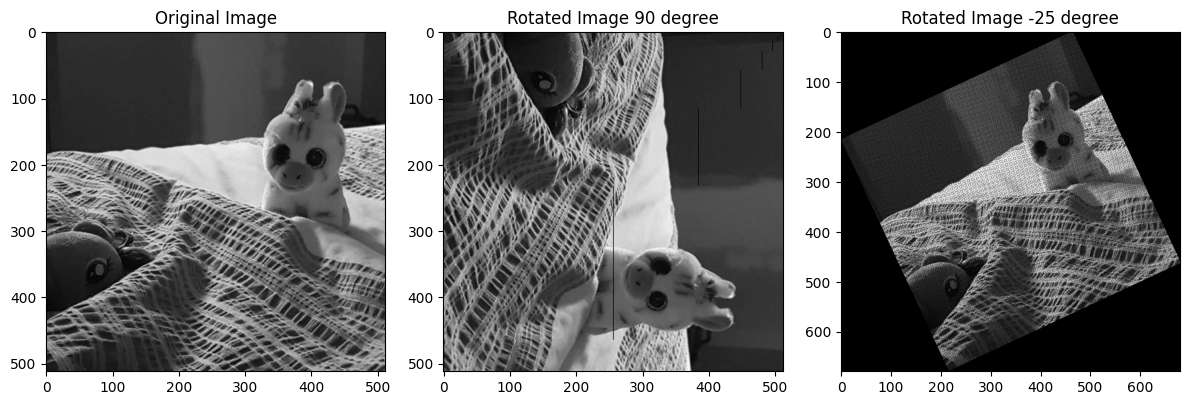

In [88]:
# Define angle in degrees
rotation_angle1 = 90
rotation_angle2 = -25

# Convert the rotation angle to radians
angle_theta1 = math.radians(rotation_angle1)
angle_theta2 = math.radians(rotation_angle2)

# Calculate the sine and cosine of the angles 90, -25
cos_theta1 = math.cos(angle_theta1)
sin_theta1 = math.sin(angle_theta1)
cos_theta2 = math.cos(angle_theta2)
sin_theta2 = math.sin(angle_theta2)

# Create the transformation (Rotation) matrix for 90,-25
matrix_T_90 = np.array([[cos_theta1, sin_theta1, 0],
                     [-sin_theta1, cos_theta1, 0],
                     [0, 0, 1]])

matrix_T_25 = np.array([[cos_theta2, sin_theta2, 0],
                     [-sin_theta2, cos_theta2, 0],
                     [0, 0, 1]])

# Apply the Rotation matrices and calculate new corners
rotated_corners_90 = np.dot(org_corners, matrix_T_90)
rotated_corners_25 = np.dot(org_corners, matrix_T_25)


# Extract the x and y coordinates of the transformed corners
corner_x_90 = rotated_corners_90[:, 0] #width
corner_y_90 = rotated_corners_90[:, 1] #height

corner_x_25 = rotated_corners_25[:, 0] #width
corner_y_25 = rotated_corners_25[:, 1] #height

# Calculate the minimum and maximum x and y values to get the new image size
image_width_90 = int(np.max(corner_x_90) - np.min(corner_x_90))
image_height_90 = int(np.max(corner_y_90) - np.min(corner_y_90))

image_width_25 = int(np.max(corner_x_25) - np.min(corner_x_25))
image_height_25 = int(np.max(corner_y_25) - np.min(corner_y_25))

# Print the new image size
print("Image Size 90 deg:", image_width_90, "x", image_height_90)
print("Image Size -25 deg:", image_width_25, "x", image_height_25)

# Generate an empty image with the calculated size
empty_image_90 = np.zeros((image_height_90, image_width_90), dtype=np.uint8)
empty_image_25 = np.zeros((image_height_25, image_width_25), dtype=np.uint8)

min_width_90 = round(abs(np.min(corner_x_90)));
min_height_90 = round(abs(np.min(corner_y_90)));

print("min Width, height 90:", min_width_90, min_height_90)

min_width_25 = round(abs(np.min(corner_x_25)));
min_height_25 = round(abs(np.min(corner_y_25)));

print("min Width, height -25:", min_width_25, min_height_25)

# Transform each pixel of the original grayscale image
for y in range(y_max):
    for x in range(x_max):
        pixel = np.array([x, y, 1])

        rot_pixel_90 = np.dot(pixel, matrix_T_90)
        new_x_90 = int(rot_pixel_90[0])
        new_y_90 = int(rot_pixel_90[1])
        empty_image_90[new_y_90, new_x_90] = gray_image[y, x]

        rot_pixel_25 = np.dot(pixel, matrix_T_25)
        new_x_25 = int(rot_pixel_25[0]) + min_width_25
        new_y_25 = int(rot_pixel_25[1]) + min_height_25
        empty_image_25[new_y_25, new_x_25] = gray_image[y, x]



# Display the original image, transformed images of 90 degree and -25 degree
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')


plt.subplot(132)
plt.imshow(empty_image_90, cmap='gray')
plt.title('Rotated Image 90 degree')

plt.subplot(133)
plt.imshow(empty_image_25, cmap='gray')
plt.title('Rotated Image -25 degree')

plt.tight_layout()
plt.show()

## Task 8:

## Task 9:

## Task 10: